$\newcommand{\diag}{{\text{diag}}}$

In [1]:
import numpy as np

## Resources
- [Cheat sheet](https://courses.engr.illinois.edu/ece498rc3/fa2016/material/linearAlgebra_4pgs.pdf)
- [3blue1brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
- [Intuitive math](https://intuitive-math.club/linear-algebra/spaces)

# Basic concepts

In [2]:
# Scalar
x = 2
print(x)

2


In [4]:
# Vector
x = np.array([1, 2, 3])
print(x)

[1 2 3]


**Norm**
- [Wikipedia entry](https://en.wikipedia.org/wiki/Norm_(mathematics))

$$\|x\|_p = \left( \sum_{i=1}^n |x_i|^p \right)^{\dfrac 1 p}$$

In ML we are usually using $L_1, L_2, L_{\infty}$ norm.

$L_1$ norm: $\|x\|_1 = \sum_{i=1}^n |x_i|$

$L_2$ norm $\|x\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$

$L_{\infty}$ norm $\|x\|_\infty = \max(\{|x_0| ..., |x_n|\})$

In [5]:
print(np.linalg.norm(x, ord=1))
print(np.linalg.norm(x, ord=2))
print(np.linalg.norm(x, ord=np.inf))

6.0
3.7416573867739413
3.0


In [6]:
np.sum(x), np.sqrt(np.sum(x**2)), np.max(np.abs(x))

(6, 3.7416573867739413, 3)

**Distance between 2 vectors**  
With $L_p$ norm distance between 2 vectors $x_1, x_2$ is defined as
$$d_p(x_1, x_2) = \|x_1 - x_2\|_p$$

In [7]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
d = np.linalg.norm(x1 - x2)
print(d)

5.196152422706632


**Linear independence**

[Wikipedia entry](https://en.wikipedia.org/wiki/Linear_independence)

$$\lambda_1 x_1 +  \lambda_2 x_2 + \dots \lambda_mx_m = 0$$

**Matrix** 

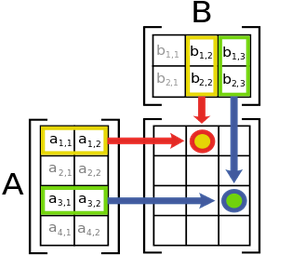

- matrix product is associative but not necessarily commutative
- Inverse: $A^{-1}A = I$ and $\exists A^{-1} \iff \det(A) \neq 0$
- Transpose: $A^T_{ij} = A_{ji}$

# Other matrices

**Positive semidefinite matrix**  
A square matrix $A$ is positive definite if and only if $x^TAx > 0$ for all $x \in \mathbb{R}^n$. If we allow the inequality to be non strict, we get the definition of a positive semidefinite matrix. 

Remember that $z^TAz$ is a scalar because $z$ is a $n \times 1$ vector and $A$ is a $n \times n$ matrix. This leads to $(1 \times n) (n\times n) (n\times 1) = 1 \times 1$ which is a scalar.

# Matrix factorizations

Matrices can be written as product of other matrices. 

*Intuition*: If we view matrices as transformations, a complex matrix might be the result of a sequence of simpler transformations. We can then decompose the matrix into these simpler transformations and interpret them separately.

## Eigendecomposition

- [Eigendecomposition wikipedia](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)
- [Eigenvalues & Eigenvectors wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
- [Explained visually](https://setosa.io/ev/eigenvectors-and-eigenvalues/)

**Eigenvector**  
Let $A \in \mathbb R^{n \times n}$ be a matrix. A nonzero vector $v \in \mathbb C^n$ is called an **eigenvector** of $A$ if there exists
such scalar $\lambda \in \mathbb C$ that

$$Av = \lambda v$$
$\lambda$ is called an **eigenvalue**

*Intuition*: If we interpret matrices as transformation of the space eigenvectors are the vectors that don't change position after the matrix transformation is applied. Eigenvalues are how much these vectors are scaled by. See [3blue1brown video](https://www.youtube.com/watch?v=PFDu9oVAE-g)

If $A$ has $n$ eigenvectors $(v_1, v_2 ...  v_n)$ that are **linearly independent**, corresponding to the eigenvalues
$(\lambda_1, \lambda_2, ... , \lambda_n)$, then it can be deduced that

$$A \begin{bmatrix}  v_1 && v_2 && ... && v_n \end{bmatrix} = \begin{bmatrix}  v_1 && v_2 && ... && v_n \end{bmatrix} \begin{bmatrix}  \lambda_1 \\ && \lambda_2  \\ && && \ddots \\ && && &&  \lambda_n \end{bmatrix}$$

Let $V = \begin{bmatrix}  v_1 && v_2 && ... && v_n \end{bmatrix} \Rightarrow \exists V^{-1} \Rightarrow$ the eigendecomposition of $A$ is 
$$A = V \diag(\lambda) V^{-1} \iff A = \sum_{i = 1}^n \lambda_i v_i v_i^T$$

In [11]:
A = np.random.randint(0, 100, (3, 3))
# A = np.array([
#     [2, 3, 4],
#     [5, 6, 7],
#     [8, 9, 10],
# ])
assert np.linalg.det(A) != 0, "A is not linear independent"

print(A)


lam, V = np.linalg.eig(A)

print(f"{lam = }")
print(V)

[[ 3 36 49]
 [20 35 42]
 [69 74 42]]
lam = array([125.4064769 , -40.84630158,  -4.56017532])
[[-0.44310521 -0.62625468  0.47741089]
 [-0.45646527 -0.2447512  -0.74164075]
 [-0.77155507  0.74020398  0.47121953]]


In [31]:
print(V @ np.diag(lam) @ np.linalg.inv(V))

[[76. 87. 20.]
 [94. 99. 90.]
 [ 5. 22. 91.]]


## SVD
- [Wikipedia entry](https://en.wikipedia.org/wiki/Singular_value_decomposition)
- [Great series on svd](https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv)

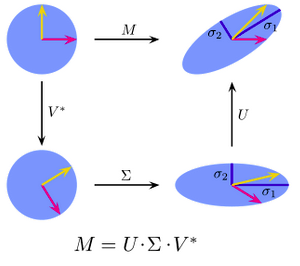

Whereas eigenvalue decomposition can be applied to certain matrices SVD can be applied to all matrices. let $A \in \mathbb{R}^{m \times n}$
$$A = U \Sigma V^T$$

Where
- $U \in R^{m \times m}$ -- Left singular vectors
- $V \in R^{n \times n}$ -- Right singular vectors
- $\Sigma$ -- singular values -- Scaling

**Remark**:
- $U, V$ represent rotations / reflections
- $\Sigma$ represents scaling
- SVD is not unique, $\Sigma$ can be uniquely determined by choosing the singular values in descending order

In [12]:
A = np.random.randint(0, 100, (3, 3))
print(A)

U, S, Vt = np.linalg.svd(A)

print("U")
print(U)
print("S")
print(S)
print("Vt")
print(Vt)

print()
print(U @ np.diag(S) @ Vt)

[[65 40 75]
 [23 44 60]
 [86 21 51]]
U
[[-0.66274838 -0.13325757 -0.73689009]
 [-0.43967394 -0.72732125  0.52696359]
 [-0.60617771  0.67323564  0.42344109]]
S
[161.16575935  44.35310716   3.37637344]
Vt
[[-0.65350375 -0.36350972 -0.66392283]
 [ 0.73293926 -0.52295072 -0.43511214]
 [ 0.18903143  0.77096253 -0.60818081]]

[[65. 40. 75.]
 [23. 44. 60.]
 [86. 21. 51.]]


In [47]:
print(U @ U.T)
print()
print(Vt @ Vt.T)

[[ 1.00000000e+00  3.27698672e-16  1.23342257e-16]
 [ 3.27698672e-16  1.00000000e+00 -1.89432798e-16]
 [ 1.23342257e-16 -1.89432798e-16  1.00000000e+00]]

[[ 1.00000000e+00  1.46479185e-16 -1.48407940e-17]
 [ 1.46479185e-16  1.00000000e+00 -1.59348659e-18]
 [-1.48407940e-17 -1.59348659e-18  1.00000000e+00]]
